In [90]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.multicomp import multipletests 
data = pd.read_csv('/content/sample_data/ab_browser_test.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
data.shape

(566134, 6)

Задание 1.

In [4]:
diff_n_clicks = data[data['slot']=='exp']['n_clicks'].sum() - data[data['slot']=='control']['n_clicks'].sum()
print(diff_n_clicks*100/data[data['slot']=='control']['n_clicks'].sum())

1.6135689824415806


Задание 2. 

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [15]:
group_exp = data[data['slot']=='exp'].n_clicks
group_control = data[data['slot']=='control'].n_clicks

In [16]:
np.random.seed(0)

group_exp_median_scores = map(np.median, get_bootstrap_samples(group_exp.values, 100))
group_control_median_scores = map(np.median, get_bootstrap_samples(group_control.values, 100))

group_exp_mean_scores = map(np.mean, get_bootstrap_samples(group_exp.values, 100))
group_control_mean_scores = map(np.mean, get_bootstrap_samples(group_control.values, 100))

In [17]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(group_exp_median_scores, group_control_median_scores))
delta_mean_scores = map(lambda x: x[1] - x[0], zip(group_exp_mean_scores, group_control_mean_scores))

In [18]:
print("95% confidence interval for the difference between medians",  stat_intervals(list(delta_median_scores), 0.05))
print("95% confidence interval for the difference between means",  stat_intervals(list(delta_mean_scores), 0.05))

95% confidence interval for the difference between medians [-1. -1.]
95% confidence interval for the difference between means [-0.40760687 -0.19018207]


Задание 3.

Посмотрим на распределение наших выборок с помощью Q-Q plot

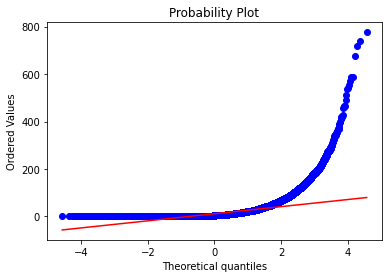

In [22]:
import pylab 
import scipy.stats as stats

stats.probplot(group_exp, dist="norm", plot=pylab)
pylab.show()


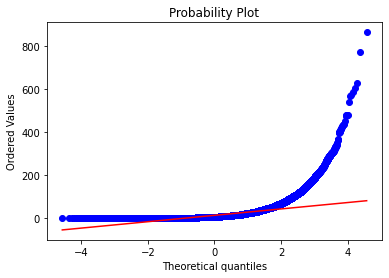

In [23]:
stats.probplot(group_control, dist="norm", plot=pylab)
pylab.show()


Видим из графиков, что выборки мало похожи на нормальные

Задание 4.

In [81]:
np.random.seed(0)
n_boot_samples = 500
bootstrap_exp = get_bootstrap_samples(group_exp.values,n_boot_samples)
bootstrap_control_mean = map(np.mean, bootstrap_control)
bootstrap_control_std = np.std(bootstrap_control,axis = 0, ddof = 1)

In [83]:
stats.probplot(list(bootstrap_control_mean) , dist="norm", fit= True, rvalue=True,plot=None)[1]

(0.03821611315715045, 11.280319503503728, 0.9991755399263491)

In [86]:
stats.probplot(list(bootstrap_control_std), dist="chi2", sparams=(len(list(bootstrap_control_std))-1), fit= True, rvalue=True,plot=None)[1]

(0.004383681847721979, -1227.4051489365143, 0.9462970459338818)

Задание 5.

In [87]:
group_exp = data[data['slot']=='exp'].groupby('userID').agg({'n_clicks':'sum'},axis = 1)
group_control = data[data['slot']=='control'].groupby('userID').agg({'n_clicks':'sum'},axis = 1)

In [88]:
stats.mannwhitneyu(group_exp,group_control)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

Задание 6.

In [97]:
exp = data.slot.loc[data.slot == 'exp'].index
ctrl = data.slot.loc[data.slot == 'control'].index
browsers_nclicks_exp = data.loc[exp].groupby(['browser', 'userID']).sum().loc[:,'n_clicks']
browsers_nclicks_ctrl = data.loc[ctrl].groupby(['browser', 'userID']).sum().loc[:,'n_clicks']
browsers = np.unique(data.browser)
print('Unique browsers numbers: ' + str(browsers))
print('')

print('Mann-Whitney rank test without multipletest')
mw_p = np.empty(browsers.shape[0])
for i, br in enumerate(browsers):
    print('Browser : ' ,br),
    _, mw_p[i] = stats.mannwhitneyu(browsers_nclicks_exp.loc[br, :], browsers_nclicks_ctrl.loc[br, :], alternative='two-sided')
    print('p-value = %.4f' % mw_p[i])

print('')
print('Mann-Whitney rank test with multipletest')
_, mw_p_corr, _, _ = multipletests(mw_p, alpha = 0.05, method = 'holm')
for i, br in enumerate(browsers):
    print('Browser : ' ,br),
    print('p-value = %.4f' % mw_p_corr[i])

Unique browsers numbers: ['Browser #14' 'Browser #17' 'Browser #2' 'Browser #20' 'Browser #22'
 'Browser #4']

Mann-Whitney rank test without multipletest
Browser :  Browser #14
p-value = 0.0000
Browser :  Browser #17
p-value = 0.0748
Browser :  Browser #2
p-value = 0.0545
Browser :  Browser #20
p-value = 0.9073
Browser :  Browser #22
p-value = 0.5148
Browser :  Browser #4
p-value = 0.8152

Mann-Whitney rank test with multipletest
Browser :  Browser #14
p-value = 0.0000
Browser :  Browser #17
p-value = 0.2992
Browser :  Browser #2
p-value = 0.2724
Browser :  Browser #20
p-value = 1.0000
Browser :  Browser #22
p-value = 1.0000
Browser :  Browser #4
p-value = 1.0000
